In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('data.csv', delimiter=';')
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df.head()

,open,close,high,low,volume,company
time,,,,,,
2006-07-19 00:00:00+00:00,203.25,203.50,204.30,200.20,61148110,ROSN
2006-07-20 00:00:00+00:00,204.35,203.75,204.45,203.15,11412880,ROSN
2006-07-21 00:00:00+00:00,203.50,201.85,203.65,200.30,18641060,ROSN
2006-07-24 00:00:00+00:00,202.40,202.00,202.40,201.30,7941520,ROSN
2006-07-25 00:00:00+00:00,203.30,202.60,203.75,202.00,16748340,ROSN


In [ ]:
tickers = ['ROSN', 'GAZP', 'LKOH', 'NVTK', 'SNGS', 'TATN']

ROSN = df[df['company'] == 'ROSN'].drop(columns=['company'])
GAZP = df[df['company'] == 'GAZP'].drop(columns=['company'])
LKOH = df[df['company'] == 'LKOH'].drop(columns=['company'])
NVTK = df[df['company'] == 'NVTK'].drop(columns=['company'])
SNGS = df[df['company'] == 'SNGS'].drop(columns=['company'])
TATN = df[df['company'] == 'TATN'].drop(columns=['company'])

dataframes = {ticker: eval(ticker) for ticker in tickers}
ma_day = [50, 100, 300]

ma_columns = [f"MA_{ma}d" for ma in ma_day]

for ticker, df in dataframes.items():
    dataframes[ticker] = df.drop(columns=ma_columns, errors='ignore')

ROSN, GAZP, LKOH, NVTK, SNGS, TATN = [dataframes[ticker] for ticker in tickers]

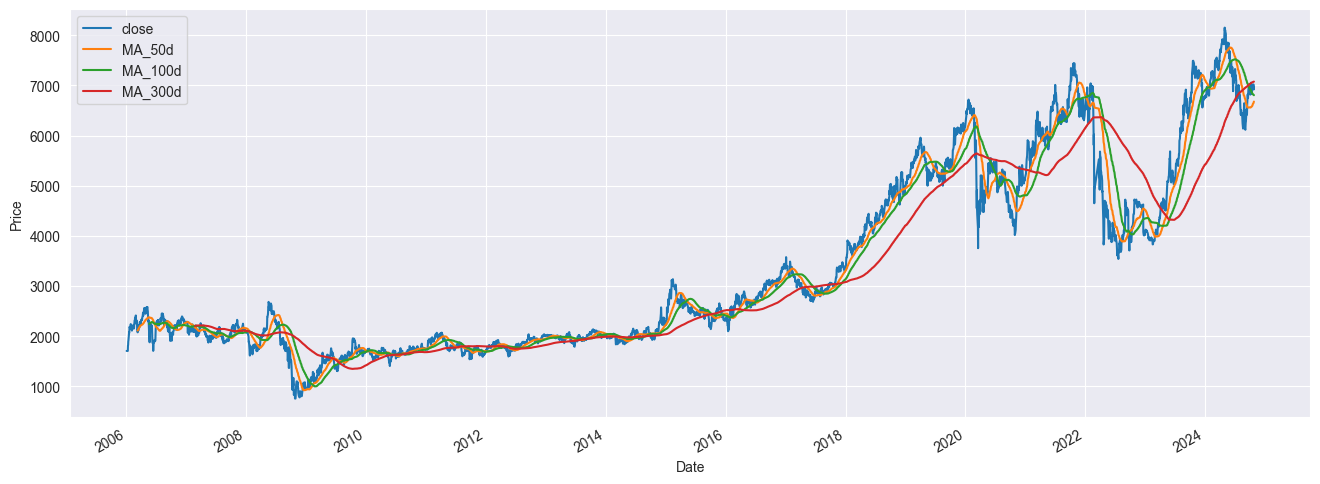

In [ ]:
ma_columns = [f"MA_{ma}d" for ma in ma_day]

for ma in ma_day:
    column_name = f"MA_{str(ma)}d"
    LKOH[column_name] = pd.DataFrame.rolling(LKOH['close'], ma).mean()

LKOH[['close'] + ma_columns].plot(figsize=(16, 6))
LKOH.drop(columns=ma_columns, inplace=True)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

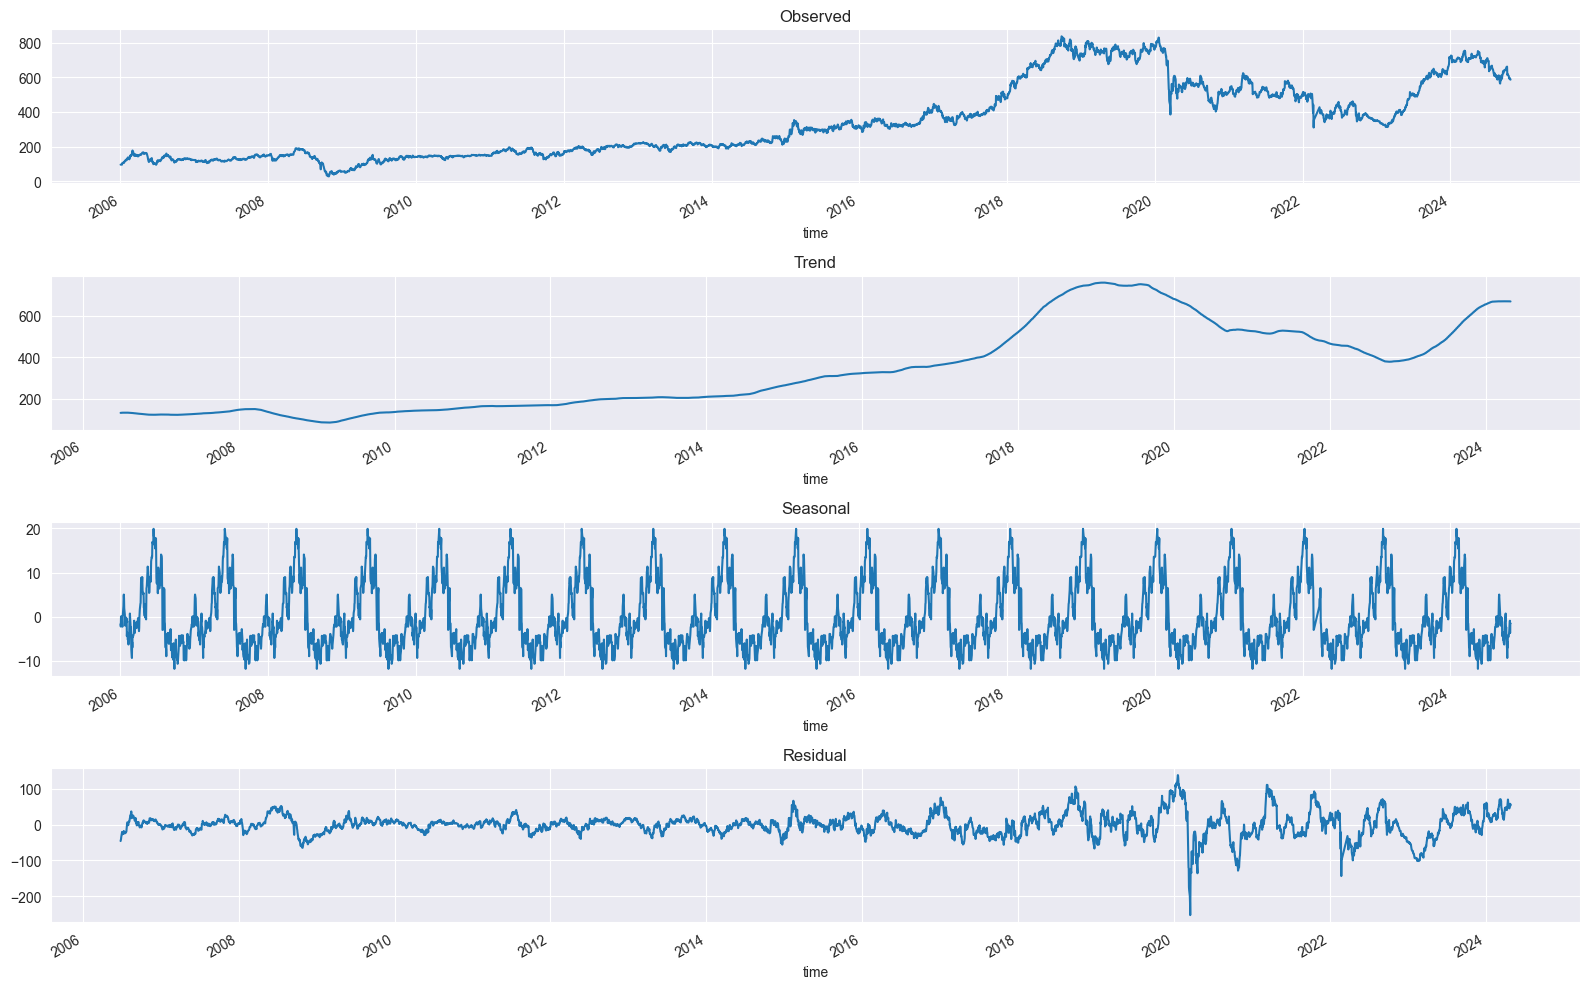

DickeyFuller Test:
ADF Statistic: -1.1280248649664741
p-value: 0.7037675249576428
Critical Values: {'1%': np.float64(-3.43170996518798), '5%': np.float64(-2.8621409523584336), '10%': np.float64(-2.5670898885616915)}

KPSS Test:
KPSS Statistic: 8.7961728155522
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss


result = seasonal_decompose(TATN['close'], period=252)  # 252 - количество торговых дней в году, расчет снизу


_, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 10))

result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

adf_result = adfuller(TATN['close'].dropna())
print("DickeyFuller Test:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:", adf_result[4])

kpss_result = kpss(TATN['close'].dropna())
print("\nKPSS Test:")
print(f"KPSS Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")
print("Critical Values:", kpss_result[3])


Декомпозиция временного ряда котировок TATN показывает устойчивый долгосрочный рост цен до 2020 года, после которого следует спад и частичное восстановление, отражающее влияние крупных экономических событий. Сезонная составляющая стабильна, указывая на регулярные колебания, что полезно для краткосрочных прогнозов. Остаточные колебания демонстрируют значительную волатильность в некоторые периоды, что может быть связано с внешними непредсказуемыми факторами, требующими внимания при анализе.


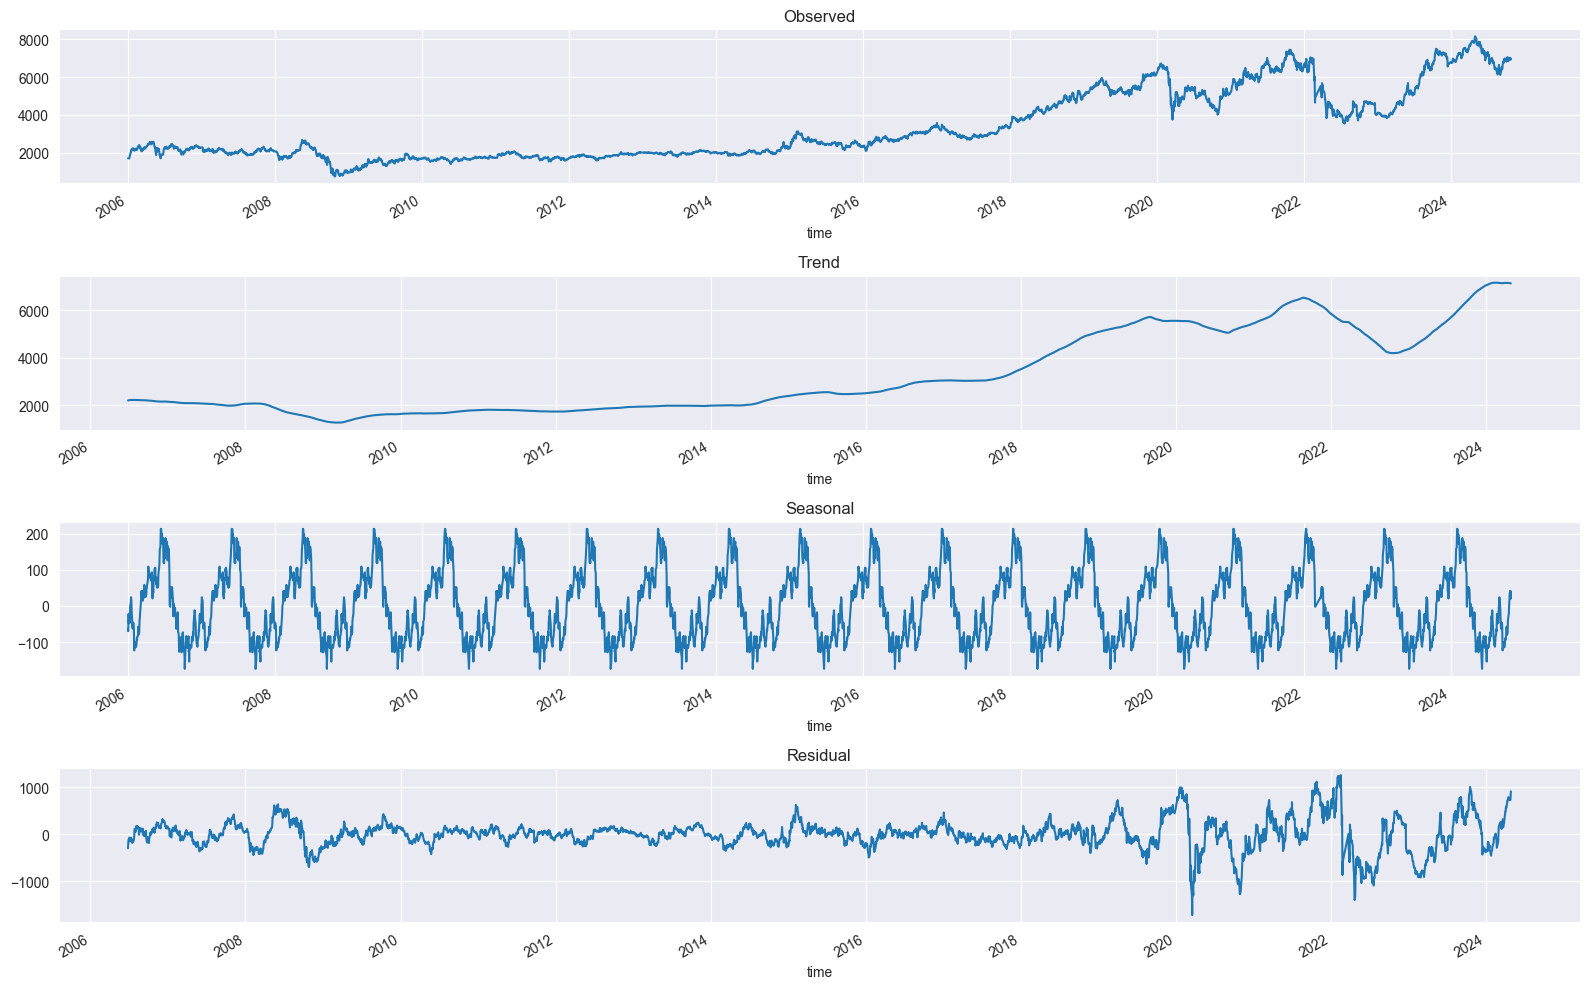

DickeyFuller Test:
ADF Statistic: -0.7306051279794212
p-value: 0.8386620743483189
Critical Values: {'1%': np.float64(-3.4317102480761292), '5%': np.float64(-2.862141077334742), '10%': np.float64(-2.5670899550918262)}

KPSS Test:
KPSS Statistic: 9.068576161695693
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

result = seasonal_decompose(LKOH['close'], period=252)  # 252 - количество торговых дней в году, расчет снизу

_, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 10))

result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

adf_result = adfuller(LKOH['close'].dropna())
print("DickeyFuller Test:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:", adf_result[4])

kpss_result = kpss(LKOH['close'].dropna())
print("\nKPSS Test:")
print(f"KPSS Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")
print("Critical Values:", kpss_result[3])

Декомпозиция временного ряда котировок LKOH показывает устойчивый долгосрочный рост цен, который временно замедляется в периоды экономической нестабильности, а затем продолжается. Сезонная составляющая демонстрирует регулярные и предсказуемые колебания, указывая на сильные сезонные эффекты, вероятно, связанные с циклической природой бизнеса компании или глобальными нефтяными рынками. Остаточная компонента указывает на значительные колебания в периоды кризисов, таких как финансовые потрясения или важные новости, что подчеркивает чувствительность акций к внешним событиям.


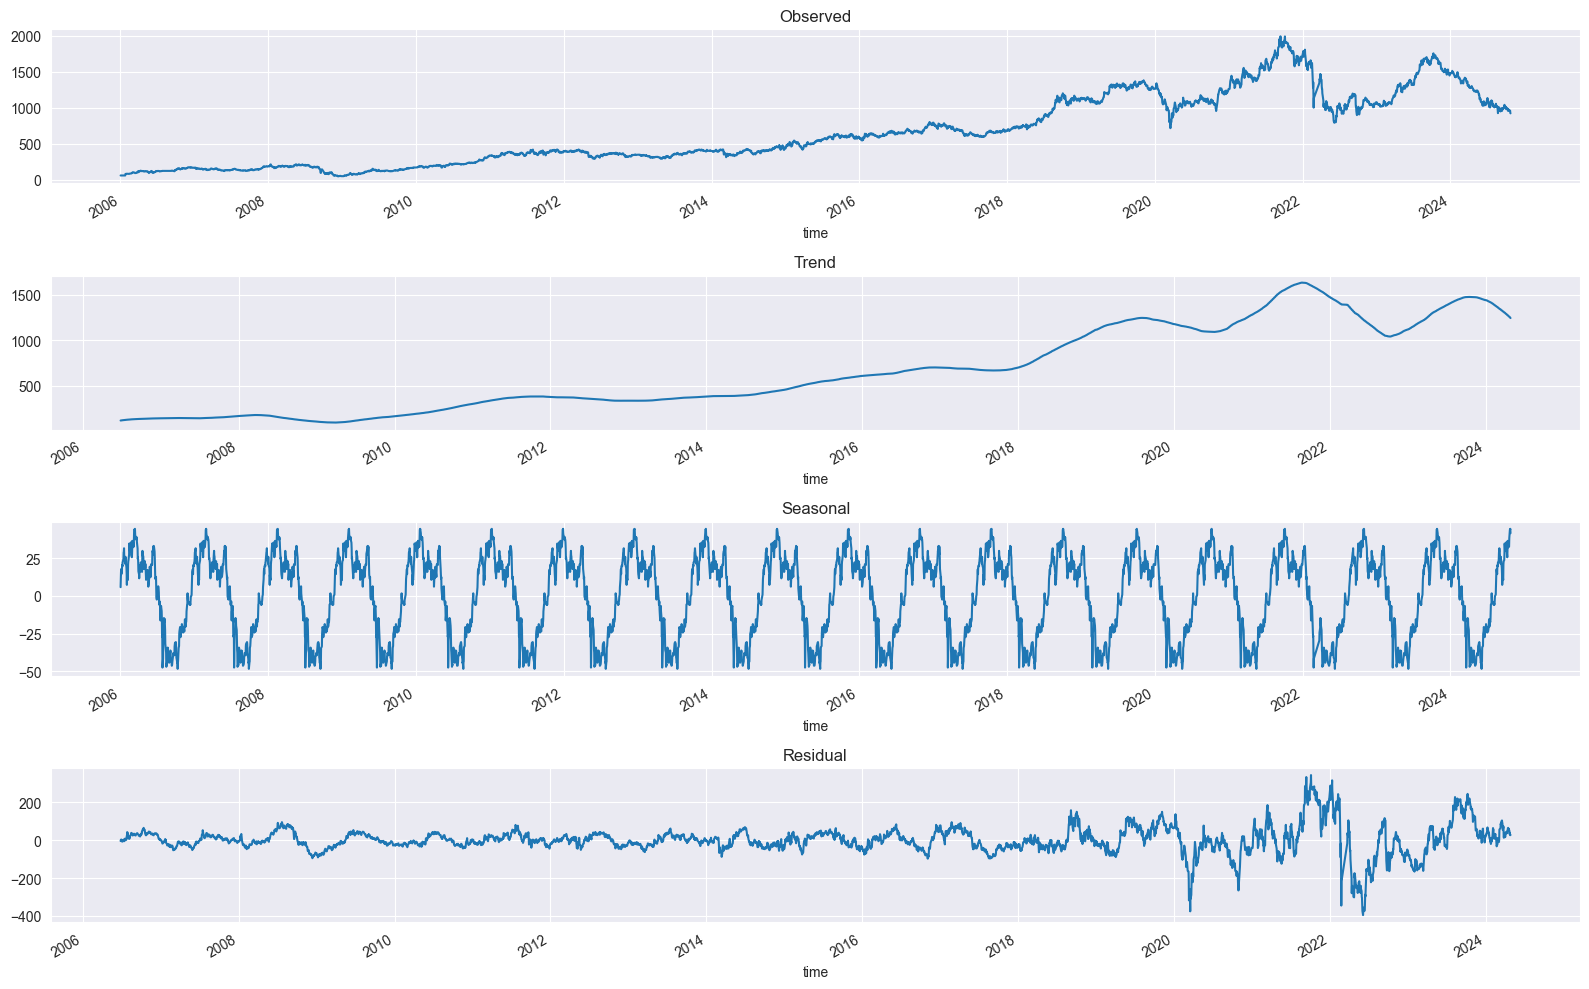

DickeyFuller Test:
ADF Statistic: -1.446526865265199
p-value: 0.5597786801884678
Critical Values: {'1%': np.float64(-3.4317102480761292), '5%': np.float64(-2.862141077334742), '10%': np.float64(-2.5670899550918262)}

KPSS Test:
KPSS Statistic: 10.018009307048162
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

result = seasonal_decompose(NVTK['close'], period=252)  # 252 - количество торговых дней в году, расчет снизу

_, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 10))

result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

adf_result = adfuller(NVTK['close'].dropna())
print("DickeyFuller Test:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:", adf_result[4])

kpss_result = kpss(NVTK['close'].dropna())
print("\nKPSS Test:")
print(f"KPSS Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")
print("Critical Values:", kpss_result[3])

Декомпозиция котировок NVTK показывает устойчивый долгосрочный рост с выраженным трендом, который замедляется и корректируется в последние годы, вероятно, в ответ на значимые экономические события. Сезонная компонента демонстрирует четкие и регулярные колебания, указывая на предсказуемые сезонные влияния. Остаточная составляющая показывает повышенную волатильность в определенные периоды, что может быть связано с краткосрочными внешними факторами, такими как рыночные шоки или новости.


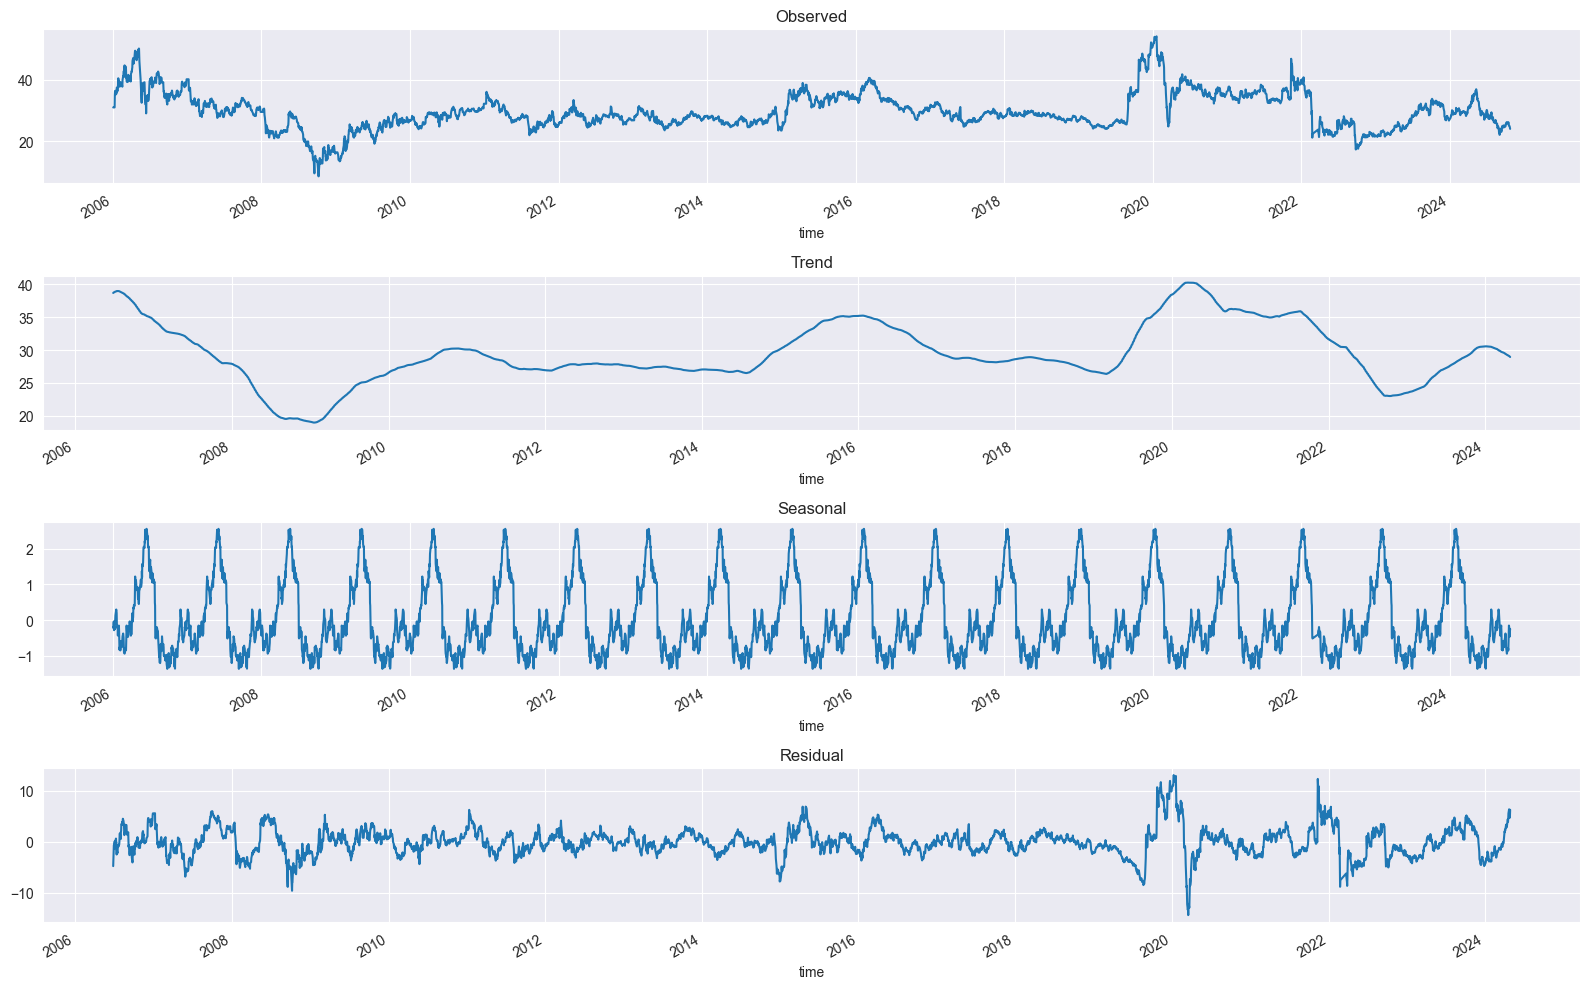

DickeyFuller Test:
ADF Statistic: -4.343998565707911
p-value: 0.000372415244366879
Critical Values: {'1%': np.float64(-3.4317026511738518), '5%': np.float64(-2.862137721117907), '10%': np.float64(-2.567088168437432)}

KPSS Test:
KPSS Statistic: 0.5752014980661148
p-value: 0.024890772903080473
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

result = seasonal_decompose(SNGS['close'], period=252)  # 252 - количество торговых дней в году, расчет снизу

_, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 10))

result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

adf_result = adfuller(SNGS['close'].dropna())
print("DickeyFuller Test:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:", adf_result[4])

kpss_result = kpss(SNGS['close'].dropna())
print("\nKPSS Test:")
print(f"KPSS Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")
print("Critical Values:", kpss_result[3])

Декомпозиция котировок SNGS показывает долгосрочный нисходящий тренд до 2009 года, после чего наблюдается период относительной стабильности вплоть до 2014 года. Затем начинается умеренное восстановление, сопровождаемое колебаниями. Сезонная компонента демонстрирует четкие и регулярные циклы, что свидетельствует о значимых сезонных влияниях, характерных для отрасли. Остаточная компонента указывает на повышенную волатильность в периоды кризисов и неожиданных событий, что подчеркивает уязвимость акций к внешним факторам и рыночным потрясениям.


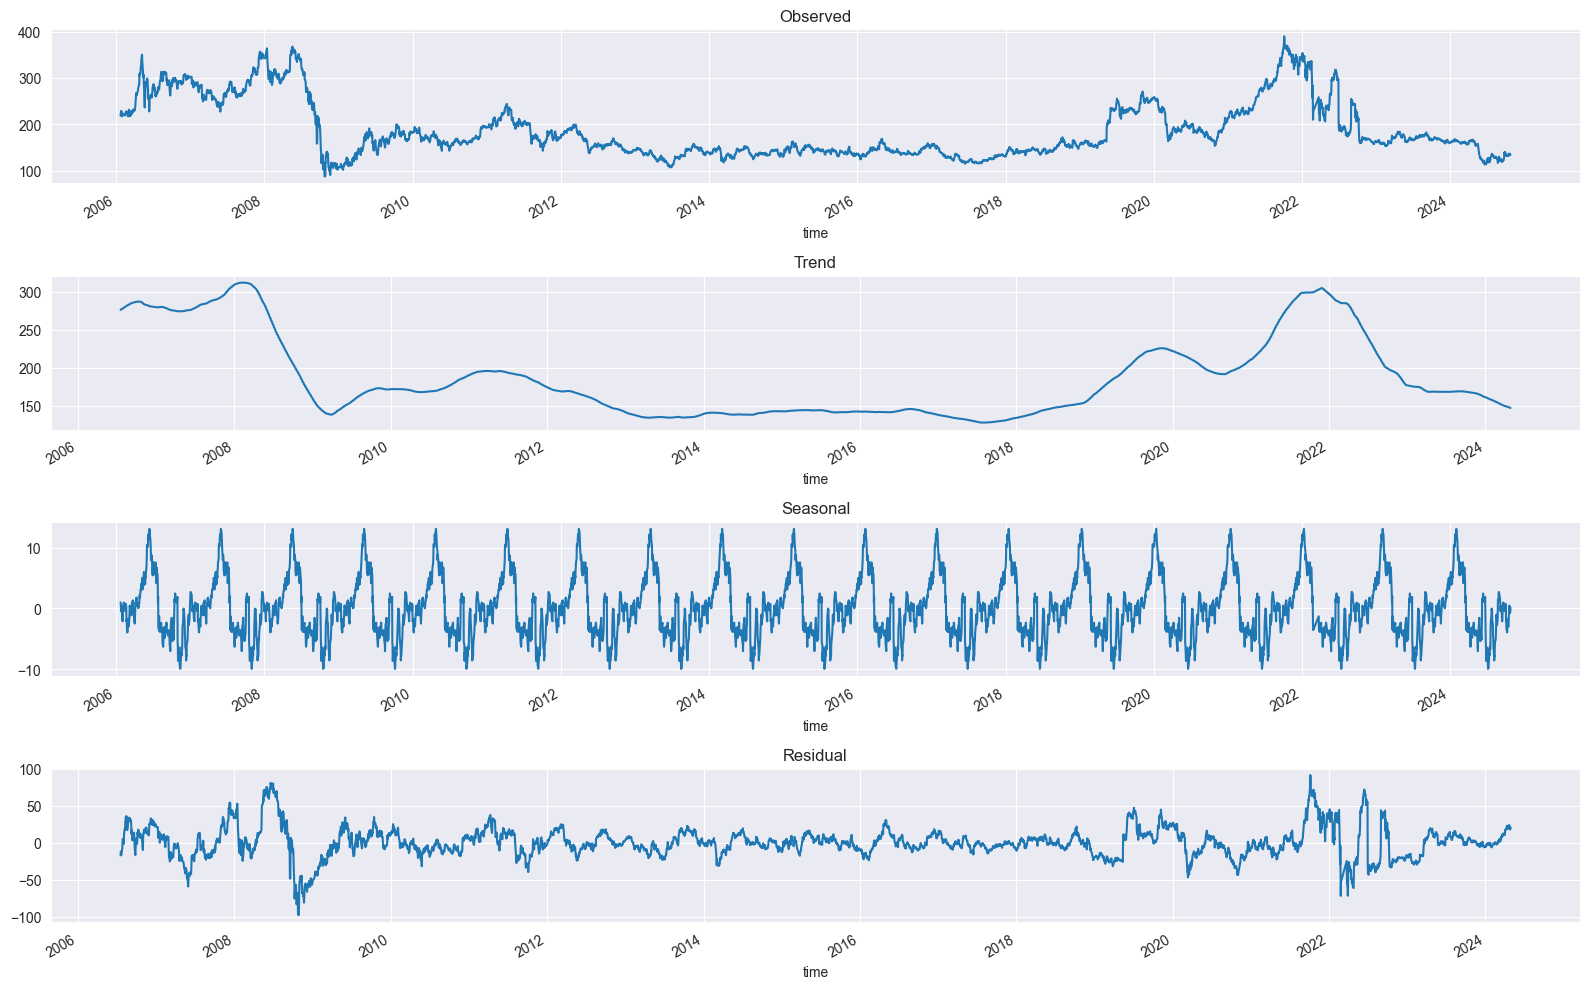

DickeyFuller Test:
ADF Statistic: -2.7816915534158646
p-value: 0.060936964604077146
Critical Values: {'1%': np.float64(-3.431713367630984), '5%': np.float64(-2.862142455512755), '10%': np.float64(-2.567090688753965)}

KPSS Test:
KPSS Statistic: 1.5579382795420402
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

result = seasonal_decompose(GAZP['close'], period=252)  # 252 - количество торговых дней в году, расчет снизу

_, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 10))

result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

adf_result = adfuller(GAZP['close'].dropna())
print("DickeyFuller Test:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:", adf_result[4])

kpss_result = kpss(GAZP['close'].dropna())
print("\nKPSS Test:")
print(f"KPSS Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")
print("Critical Values:", kpss_result[3])

Анализ временного ряда котировок GAZP показывает выраженный нисходящий тренд в период финансового кризиса 2008-2009 годов, после чего наблюдается долгий период стабилизации с умеренным восстановлением и волатильностью. Тренд в последние годы отражает влияние значительных событий, таких как пандемия и колебания на энергетическом рынке. Сезонная компонента демонстрирует регулярные и предсказуемые колебания, что указывает на влияние сезонных факторов, характерных для компании и отрасли. Остаточная компонента выявляет значительную волатильность в периоды кризисов и других крупных экономических событий, что подчеркивает уязвимость акций GAZP к внешним шокам.

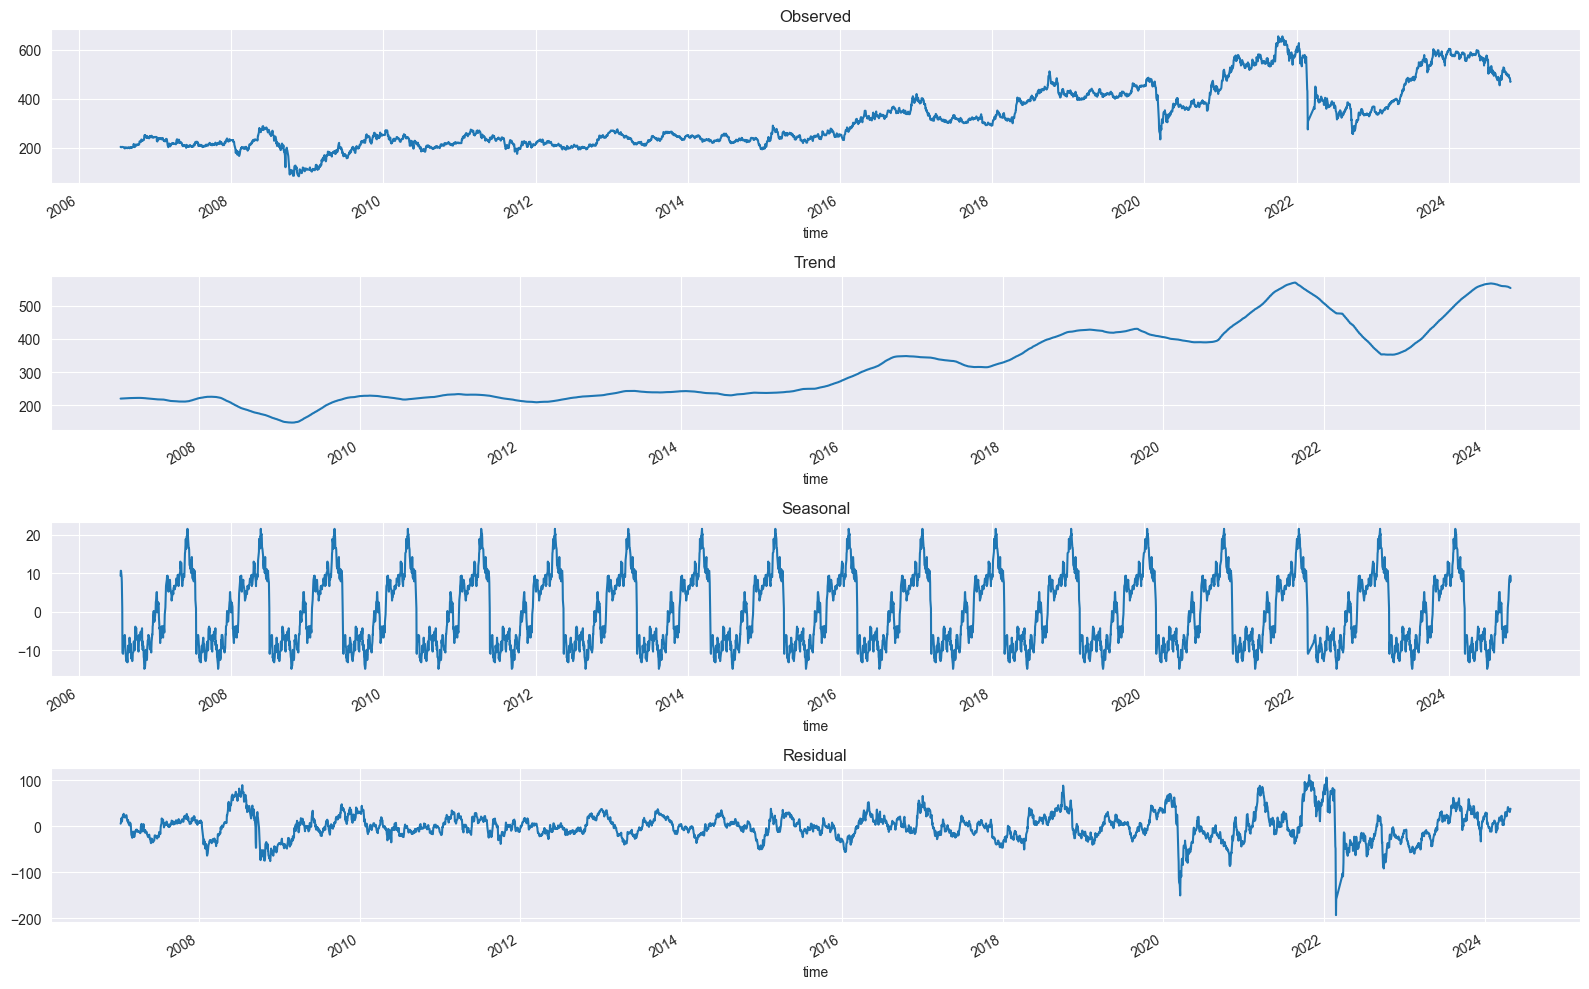

DickeyFuller Test:
ADF Statistic: -1.660724480918762
p-value: 0.45145346982046064
Critical Values: {'1%': np.float64(-3.431752250570597), '5%': np.float64(-2.862159633359289), '10%': np.float64(-2.5670998332650177)}

KPSS Test:
KPSS Statistic: 8.725724774602364
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

result = seasonal_decompose(ROSN['close'], period=252)  # 252 - количество торговых дней в году, расчет снизу

_, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 10))

result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

adf_result = adfuller(ROSN['close'].dropna())
print("DickeyFuller Test:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:", adf_result[4])

kpss_result = kpss(ROSN['close'].dropna())
print("\nKPSS Test:")
print(f"KPSS Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")
print("Critical Values:", kpss_result[3])

Декомпозиция котировок ROSN показывает относительно стабильный тренд с умеренным ростом начиная с 2015 года, сопровождаемый волатильностью в последние годы, что, вероятно, связано с колебаниями на нефтяных рынках. Сезонная составляющая отчетливо выражена, указывая на регулярные циклические изменения, связанные с характером нефтяного бизнеса. Остаточная компонента демонстрирует повышенную волатильность в периоды глобальных экономических потрясений, что подчеркивает чувствительность акций к изменениям в мировых экономических условиях.

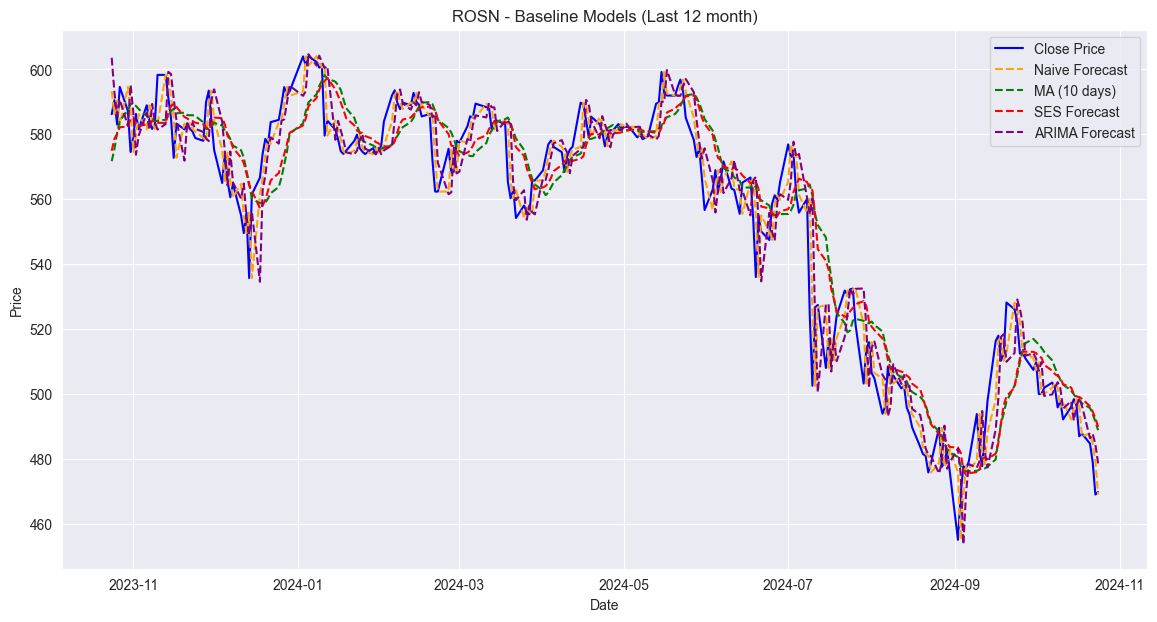

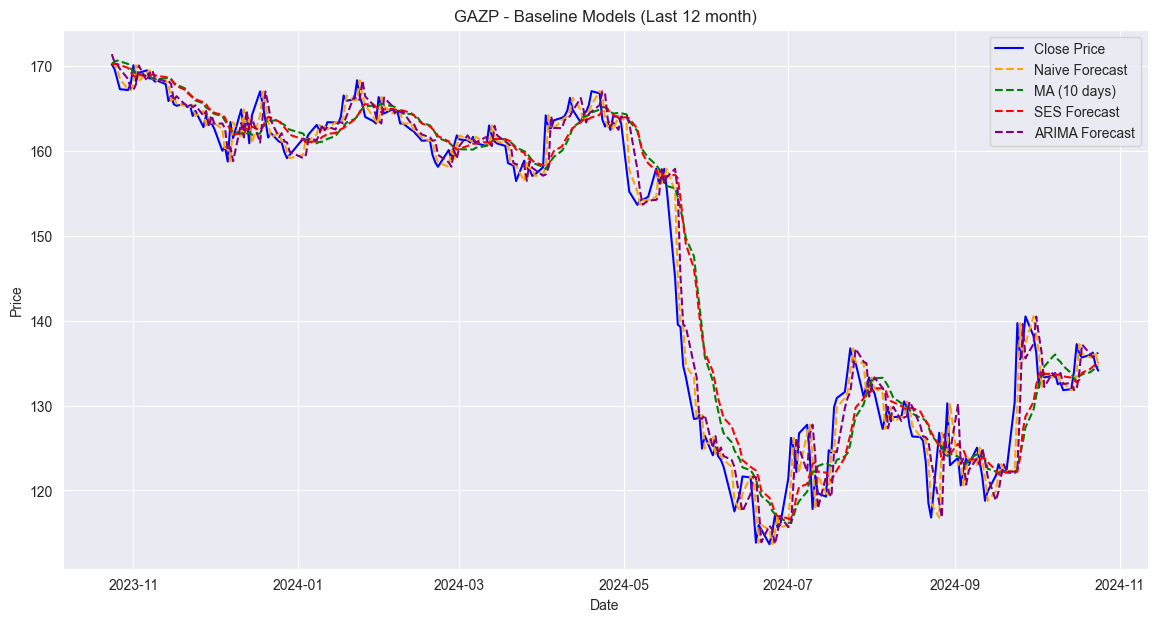

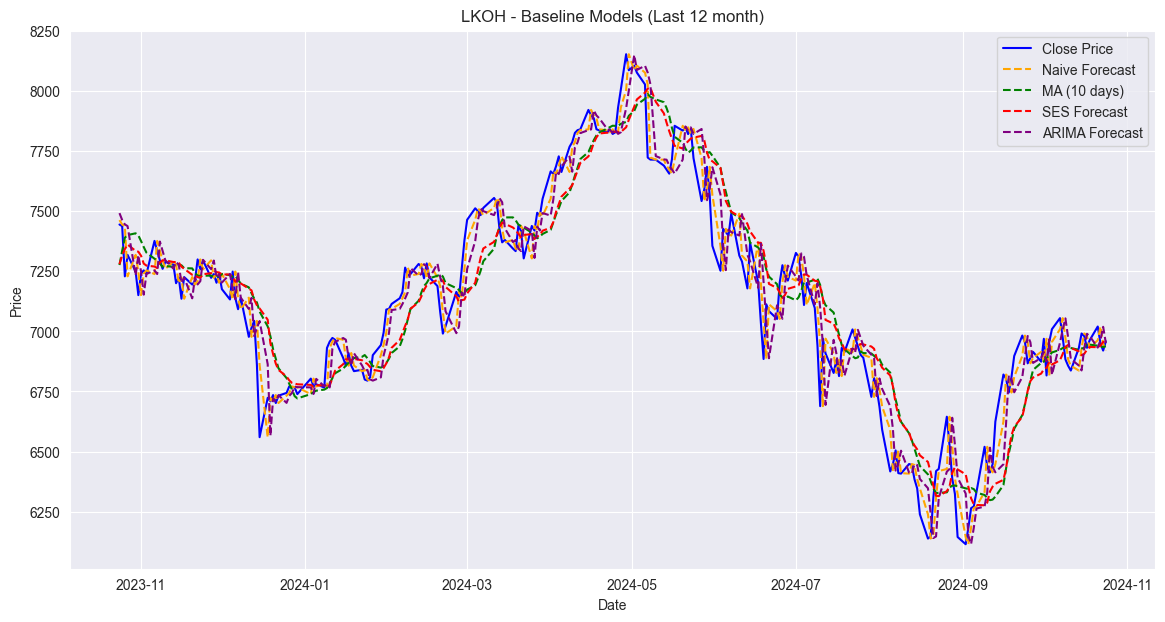

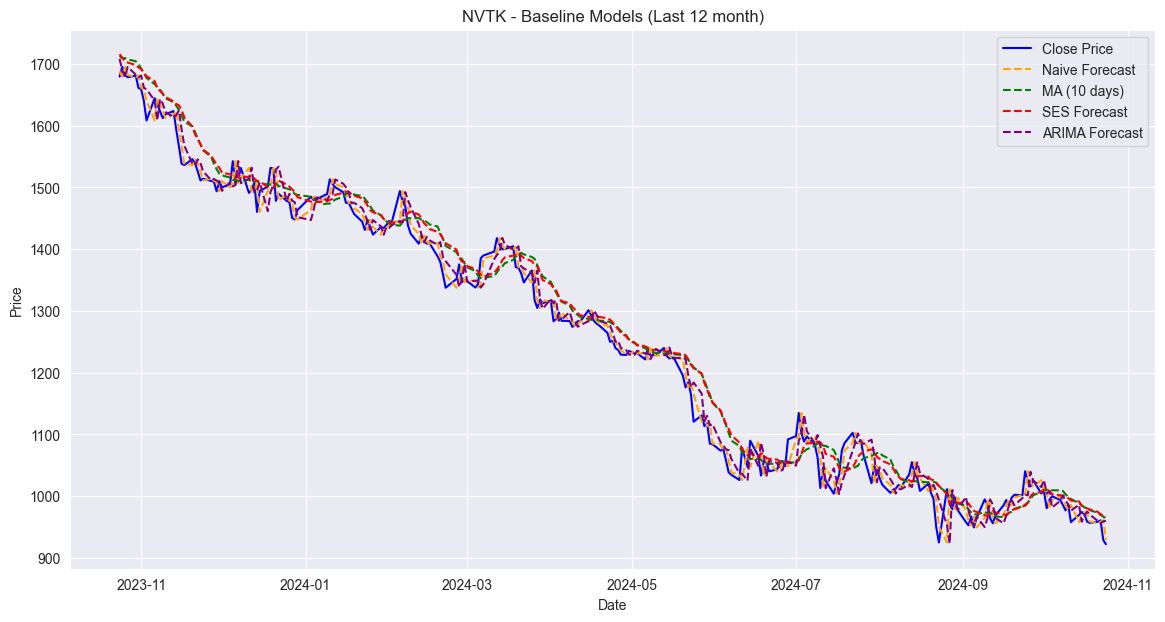

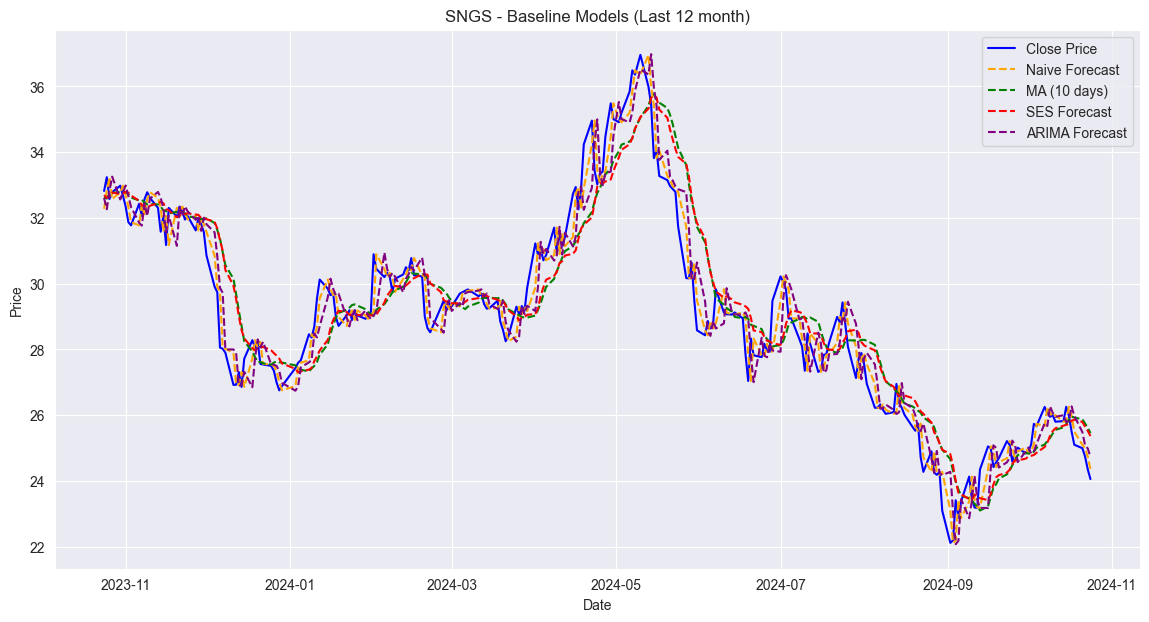

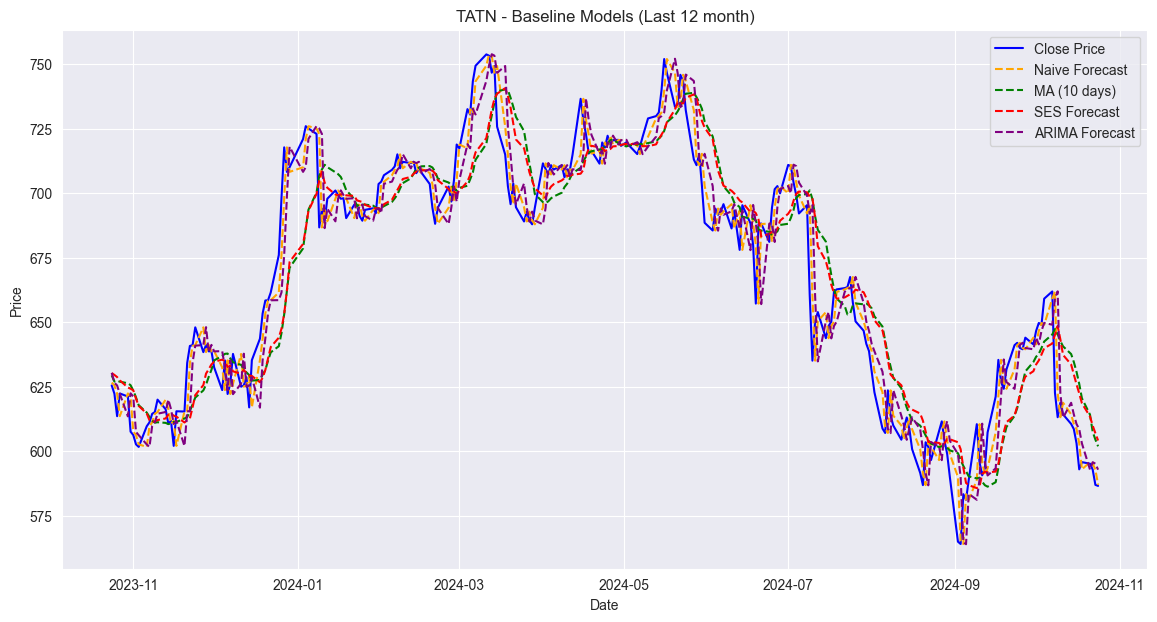


МЕТРИКИ
  Ticker  Naive_RMSE     MA_RMSE    SES_RMSE  ARIMA_RMSE  Naive_MAE  \
0   ROSN    6.729530   13.887250   13.580262    9.782063   4.205833   
1   GAZP    4.715855    9.392540    9.238759    6.640862   2.683488   
2   LKOH   72.164047  140.006080  137.756734  101.045973  43.232768   
3   NVTK   16.633141   31.521578   30.909111   23.014019   9.161995   
4   SNGS    0.686878    1.396610    1.368452    0.985053   0.448163   
5   TATN    8.126682   15.966577   15.678389   11.536149   4.927634   

      MA_MAE    SES_MAE  ARIMA_MAE  Naive_MAPE   MA_MAPE  SES_MAPE  ARIMA_MAPE  
0   8.656653   8.473628   6.188855    1.434168  2.975760  2.923453    2.119397  
1   5.694081   5.584045   3.921808    1.421218  3.028291  2.972060    2.089359  
2  87.178058  85.735180  62.628374    1.389482  2.784590  2.737600    2.021643  
3  17.995815  17.678484  13.117809    1.559380  3.115999  3.087634    2.277868  
4   0.915957   0.895111   0.651929    1.555066  3.186429  3.109264    2.270268  
5  10.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA

def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

tickers = ['ROSN', 'GAZP', 'LKOH', 'NVTK', 'SNGS', 'TATN']
window = 10

results = []

for ticker in tickers:
    df = globals()[ticker].copy()

    df['time'] = pd.to_datetime(df.index)
    df = df.sort_index()

    # Наивная модель
    df['naive_forecast'] = df['close'].shift(1)

    # Скользящее среднее
    df['moving_avg_forecast'] = df['close'].rolling(window=window).mean().shift(1)

    # Экспоненциальное сглаживание
    ses_model = SimpleExpSmoothing(df['close']).fit(smoothing_level=0.2, optimized=False)
    df['ses_forecast'] = ses_model.fittedvalues.shift(1)

    # ARIMA на базовых значениях
    df['close'] = df['close'].interpolate()
    arima_model = ARIMA(df['close'], order=(1, 1, 1)).fit()
    df['arima_forecast'] = arima_model.fittedvalues.shift(1)

    df = df.dropna()

    # МЕТРИКИ
    naive_rmse, naive_mae, naive_mape = calculate_metrics(df['close'], df['naive_forecast'])
    ma_rmse, ma_mae, ma_mape = calculate_metrics(df['close'], df['moving_avg_forecast'])
    ses_rmse, ses_mae, ses_mape = calculate_metrics(df['close'], df['ses_forecast'])
    arima_rmse, arima_mae, arima_mape = calculate_metrics(df['close'], df['arima_forecast'])

    results.append({
        'Ticker': ticker,
        'Naive_RMSE': naive_rmse, 'MA_RMSE': ma_rmse, 'SES_RMSE': ses_rmse, 'ARIMA_RMSE': arima_rmse,
        'Naive_MAE': naive_mae, 'MA_MAE': ma_mae, 'SES_MAE': ses_mae, 'ARIMA_MAE': arima_mae,
        'Naive_MAPE': naive_mape, 'MA_MAPE': ma_mape, 'SES_MAPE': ses_mape, 'ARIMA_MAPE': arima_mape
    })

    plt.figure(figsize=(14, 7))
    end_date = df.index.max()
    start_date = end_date - pd.DateOffset(years=1)
    recent_df = df.loc[start_date:end_date]

    plt.plot(recent_df.index, recent_df['close'], label='Close Price', color='blue')
    plt.plot(recent_df.index, recent_df['naive_forecast'], label='Naive Forecast', linestyle='--', color='orange')
    plt.plot(recent_df.index, recent_df['moving_avg_forecast'], label=f'MA ({window} days)', linestyle='--', color='green')
    plt.plot(recent_df.index, recent_df['ses_forecast'], label='SES Forecast', linestyle='--', color='red')
    plt.plot(recent_df.index, recent_df['arima_forecast'], label='ARIMA Forecast', linestyle='--', color='purple')
    plt.title(f'{ticker} - Baseline Models (Last 12 month)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

results_df = pd.DataFrame(results)
print("\nМЕТРИКИ")
print(results_df)


**Линейная** **регрессия**

In [22]:
import math
import numpy as np

def code_mean(ROSN, cat_feature, real_feature):
    return dict(ROSN.groupby(cat_feature)[real_feature].mean())

def preprocess_data(data, lag_start=1, lag_end=2, test_size=0.15):

    data = pd.DataFrame(data.copy())

    test_data_size = int(len(data) * test_size)

    # Тренировочная часть — все строки, кроме последних 15%
    train_data = data.iloc[:-test_data_size]
    # Тестовая часть — последние 15% строк
    test_data = data.iloc[-test_data_size:]

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data[f"lag_{i}"] = data['close'].shift(i)
    data = data.dropna()
    data['day'] = data.index.day
    data['hour'] = data.index.hour

    data = data.dropna()
    # выкидываем закодированные средними признаки
    data.drop(["day"], axis=1, inplace=True)
    # выкидываем закодированные средними признаки
    data.drop(["hour"], axis=1, inplace=True)

    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.head(math.ceil(int(len(data) * 0.85))).drop(["close"], axis=1)
    y_train = data.head(math.ceil(int(len(data) * 0.85)))["close"]
    X_test = data.tail(int(len(data) * 0.15)).drop(["close"], axis=1)
    y_test = data.tail(int(len(data) * 0.15))["close"]



    return X_train, X_test, y_train, y_test

def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

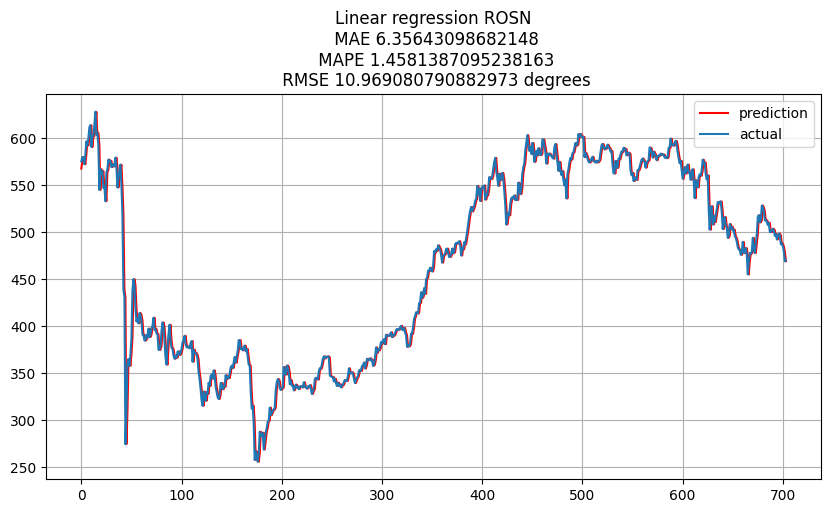

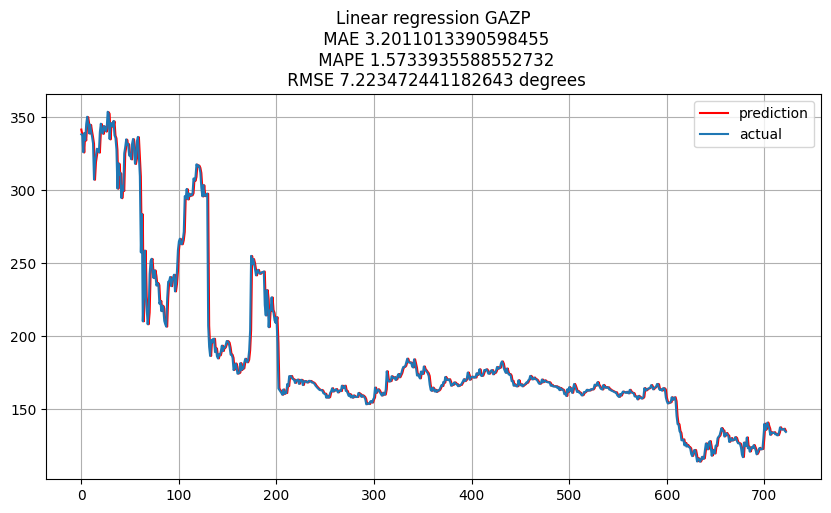

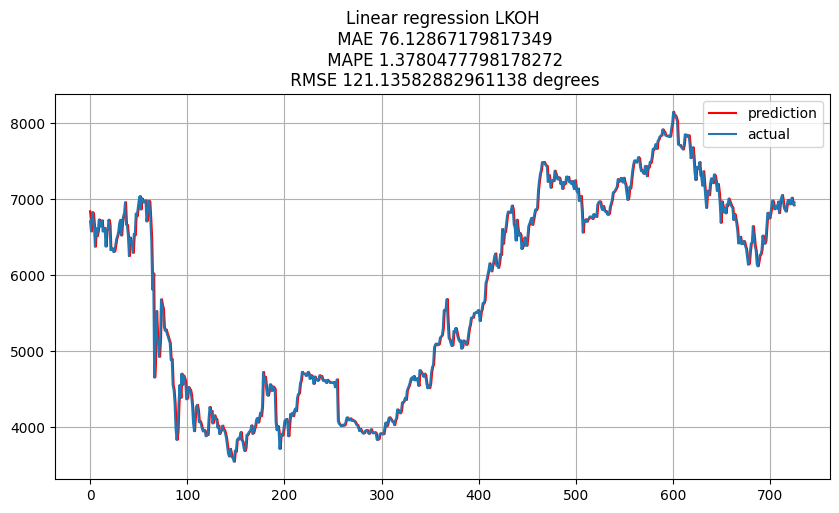

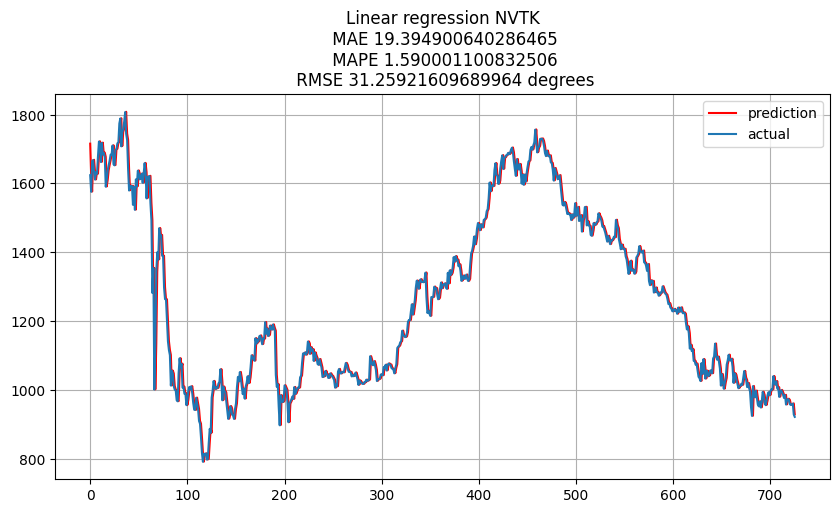

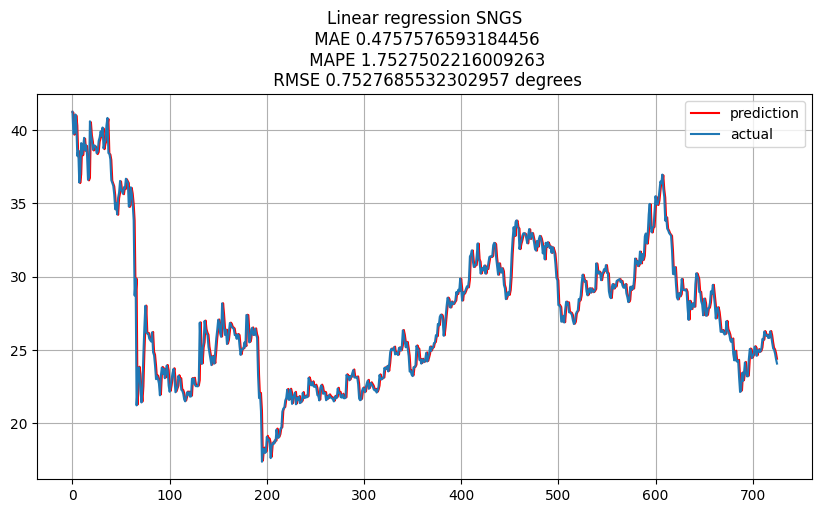

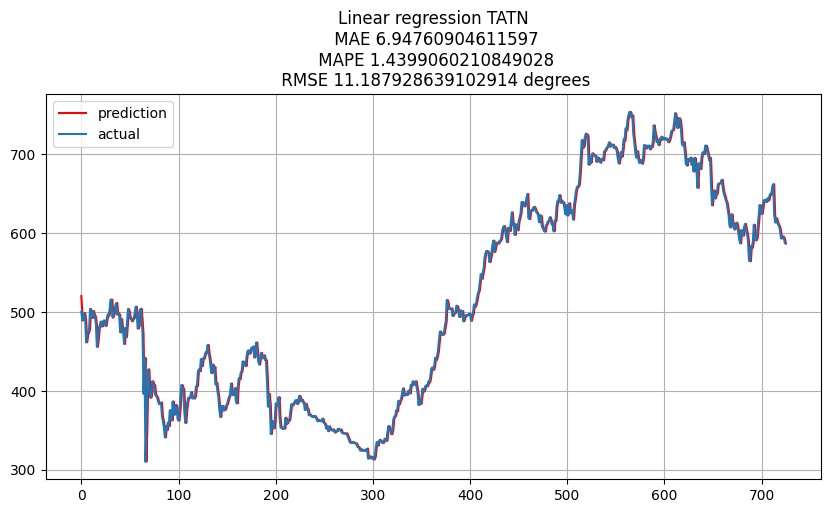

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

df = pd.read_csv("/content/drive/MyDrive/LinReg_project/data_stocks.csv",  delimiter=';')
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

ROSN = df[df['company'] == 'ROSN'].drop(columns=['company'])[['close']]
GAZP = df[df['company'] == 'GAZP'].drop(columns=['company'])[['close']]
LKOH = df[df['company'] == 'LKOH'].drop(columns=['company'])[['close']]
NVTK = df[df['company'] == 'NVTK'].drop(columns=['company'])[['close']]
SNGS = df[df['company'] == 'SNGS'].drop(columns=['company'])[['close']]
TATN = df[df['company'] == 'TATN'].drop(columns=['company'])[['close']]

tickers = [
    ("ROSN", ROSN),
    ("GAZP", GAZP),
    ("LKOH", LKOH),
    ("NVTK", NVTK),
    ("SNGS", SNGS),
    ("TATN", TATN)
]
results = []


for name, tick in tickers:
  X_train, X_test, y_train, y_test = preprocess_data(tick)
  lr = LinearRegression()
  lr.fit(X_train, y_train)

  y_pred = lr.predict(X_test)

  lr_rmse, lr_mae, lr_mape = calculate_metrics(y_test, y_pred)
  results.append({
        'Ticker': name,
        'LinReg_RMSE': lr_rmse,
        'LinReg_MAE': lr_mae,
        'LinReg_MAPE': lr_mape,
    })

  plt.figure(figsize=(10, 5))
  plt.plot(y_pred, "r", label="prediction")
  plt.plot(y_test.values, label="actual")
  plt.grid(True)
  plt.legend(loc="best")
  plt.title(f"Linear regression {name}\n MAE {lr_mae}\n MAPE {lr_mape}\n RMSE {lr_rmse} degrees")
  #plt.title(f"Linear regression {name}\n MAOE {lr_mape} degrees");
  #plt.title(f"Linear regression {name}\n RMSE {lr_rmse} degrees");


In [38]:
results_df = pd.DataFrame(results)
print("\nМЕТРИКИ")
print(results_df)


МЕТРИКИ
  Ticker  LinReg_RMSE  LinReg_MAE  LinReg_MAPE
0   ROSN    10.969081    6.356431     1.458139
1   GAZP     7.223472    3.201101     1.573394
2   LKOH   121.135829   76.128672     1.378048
3   NVTK    31.259216   19.394901     1.590001
4   SNGS     0.752769    0.475758     1.752750
5   TATN    11.187929    6.947609     1.439906
